**Problem Statement**
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
#function definitons

#Function to print null values in all columns
def nulls(df):
    return (100*round(df.isnull().sum()/len(df),4).sort_values(ascending=False))

#Function to get the VIFs for all the variables in a dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
def getvif(df):
    if 'const' in list(df.columns):
        df1=df.drop('const', axis=1) 
    else:
        df1 = df.copy()
    vif=pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif.VIF,2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [3]:
#importing dataset
df = pd.read_csv('../input/leadscore/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Cleaning and EDA

In [4]:
df.shape

(9240, 37)

In [5]:
#Let's see what columns we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Description of numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#There are a lot of columns with a lot of null values
nulls(df)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [8]:
#Lets see if there are any duplicates rows in entirety
df.duplicated(keep='first').sum()

0

In [9]:
#Lets see if there are any duplicates, this time using only the prospect ID as the identifier
df.duplicated(keep='first',subset='Prospect ID').sum()

0

In [10]:
#There are some values that have been mentioned as "Select". As per the data dictionary, these are default values selected when the user does not make any other selection.
df.Specialization.value_counts(normalize=True)*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [11]:
#For our data to make more sense, we will be replacing the "Select" values with NaNs.
df=df.replace('Select',np.nan)

In [12]:
#Now, we check for null value percentages again 
nulls_list=nulls(df)
print(nulls_list)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [13]:
#Let's drop the columns with more than 50% of null values. these would be of no use to our model building process.
df.drop(list(nulls_list.loc[nulls_list>50].index),axis=1,inplace=True)

In [14]:
#checking nulls again
nulls(df)

Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time

In [15]:
#We will try and see what these scores and indices contain
for i,each in enumerate(list(nulls(df).index)[:4]):
    print(df[each].describe())

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64
count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64
count          5022
unique            3
top       02.Medium
freq           2788
Name: Asymmetrique Profile Index, dtype: object
count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object


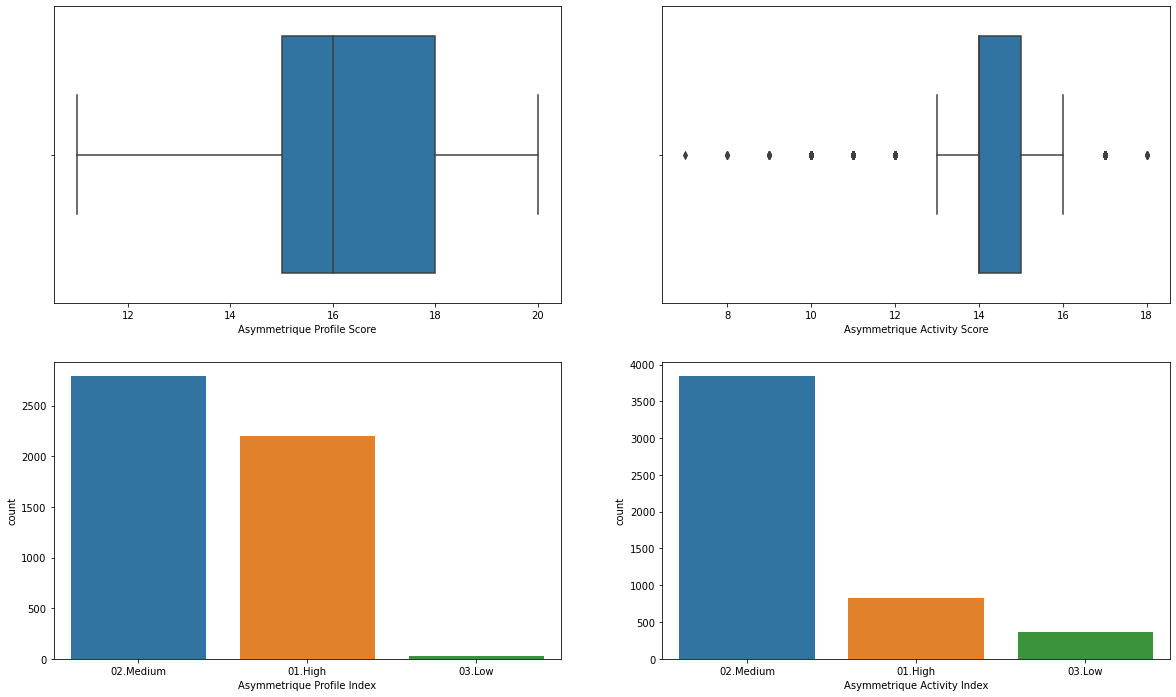

In [16]:
#The scores are numerical, using box plots
plt.figure(figsize=(20,12))
plt.subplot(221)
sns.boxplot(df['Asymmetrique Profile Score'])
plt.subplot(222)
sns.boxplot(df['Asymmetrique Activity Score'])
#Indices are categorical, using countplot
plt.subplot(223)
sns.countplot(df['Asymmetrique Profile Index'])
plt.subplot(224)
sns.countplot(df['Asymmetrique Activity Index'])

In [17]:
#We cannot see a substantial variance in these features across the data set. Thus, since a large chunk of these variables is missing, we can choose to drop it, since no vital information would be lost.
df.drop(list(nulls(df).index)[:4],axis=1,inplace=True)
nulls(df)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

In [18]:
#inspecting city
df.City.value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [19]:
#57% of our data points are from Mumbai. We can choose to impute the nulls in city column with Mumbai.
df['City'] = df['City'].replace(np.nan, 'Mumbai')
nulls(df)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine  

In [20]:
#inspecting specialization 
df['Specialization'].value_counts(normalize=True).sort_values(ascending=False)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [21]:
#Here a null might mean that either the customer has a specialization that does not exist in this list, or no specialization. We can use 'Others' as a new category here. 
df['Specialization'] = df['Specialization'].replace(np.nan,'Others')
nulls(df)

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine  

In [22]:
#inspecing tags
df.Tags.value_counts(normalize=True).sort_values(ascending=False)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [23]:
#We'll remove tags since it is a score variable
df.drop('Tags', axis=1, inplace=True)

In [24]:
#inspecting What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts(normalize=True).sort_values(ascending=False)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [25]:
#Imputing nulls with mode
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
nulls(df)

What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
What matters most to you in choosing a course     0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [26]:
#inspecing occupation feature
df['What is your current occupation'].value_counts(normalize=True).sort_values(ascending=False)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [27]:
#imputing nulls with mode
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')
nulls(df)

Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
What is your current occupation                   0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
What matters most to you in choosing a course     0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [28]:
#inspecting country
df['Country'].value_counts(normalize=True).sort_values(ascending=False)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Germany                  0.059006
South Africa             0.059006
Nigeria                  0.059006
Canada                   0.059006
Kuwait                   0.059006
Sweden                   0.044254
Netherlands              0.029503
Italy                    0.029503
Ghana                    0.029503
Philippines              0.029503
Bangladesh               0.029503
Uganda                   0.029503
China                    0.029503
Asia/Pacific Region      0.029503
Belgium                  0.029503
Sri Lanka                0.014751
Vietnam       

In [29]:
#imputing mode
df['Country'] = df['Country'].replace(np.nan, 'India')
nulls(df)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
What is your current occupation                  0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [30]:
#the rest of the features contain less than 2% null values. We can safely drop these rows.
df.dropna(inplace=True)
nulls(df)

Last Notable Activity                            0.0
What is your current occupation                  0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [31]:
#Percentage of rows retained is pretty good.
(df.shape[0]/9240)*100

98.2034632034632

Now we have the cleaned dataset ready. We will be using this for our analysis.

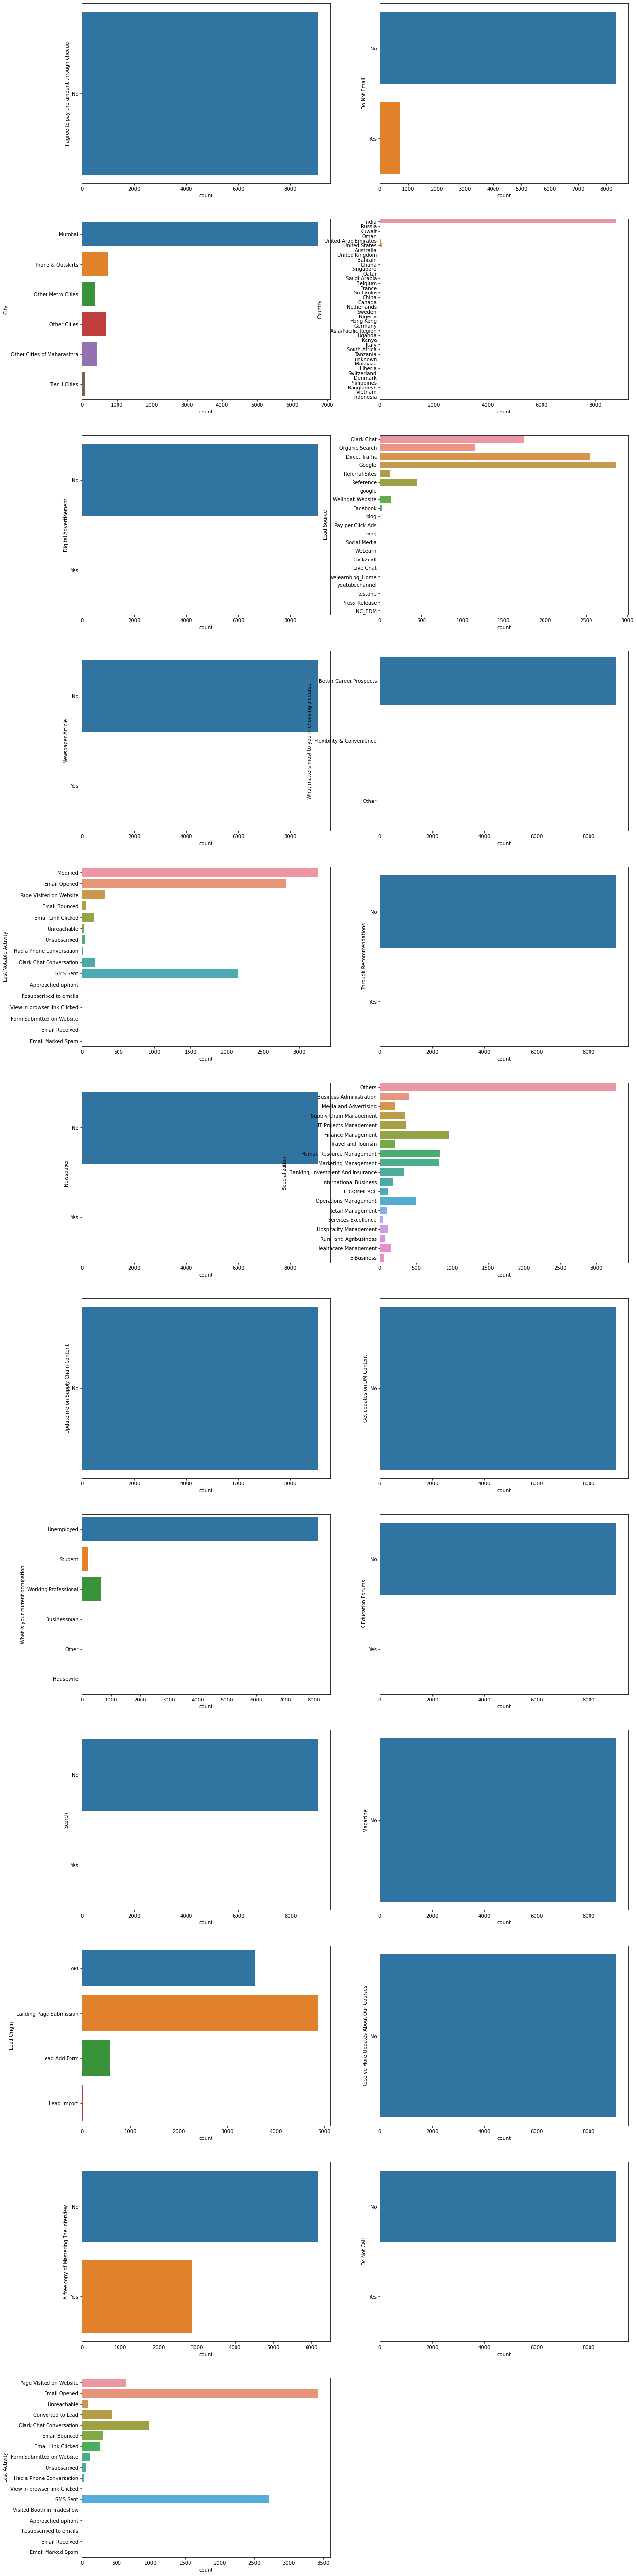

In [32]:
#We will be inspecting all the cateogrical columns, looking for highly skewed features, and features with less prominent valus that can be clubbed

plt.figure(figsize=(20,8*13))
for i,each in enumerate(list(set(df.drop('Prospect ID',axis=1).columns) - set(df._get_numeric_data().columns))):
    plt.subplot(13,2,i+1)
    sns.countplot(y=df[each])

In [33]:
#We can clearly see the following highly skewed variables, we will use value counts to confirm our suspicion
for each in ['Digital Advertisement','Through Recommendations','Magazine','Do Not Call','Search','Newspaper Article',
        'Update me on Supply Chain Content','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
        'What matters most to you in choosing a course','Do Not Email','X Education Forums','Newspaper','Country',
        'Get updates on DM Content']:
    print('\n')
    print(df[each].value_counts(normalize=True)*100)



No     99.955918
Yes     0.044082
Name: Digital Advertisement, dtype: float64


No     99.922857
Yes     0.077143
Name: Through Recommendations, dtype: float64


No    100.0
Name: Magazine, dtype: float64


No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64


No     99.845713
Yes     0.154287
Name: Search, dtype: float64


No     99.977959
Yes     0.022041
Name: Newspaper Article, dtype: float64


No    100.0
Name: Update me on Supply Chain Content, dtype: float64


No    100.0
Name: Receive More Updates About Our Courses, dtype: float64


No    100.0
Name: I agree to pay the amount through cheque, dtype: float64


Better Career Prospects      99.977959
Flexibility & Convenience     0.011020
Other                         0.011020
Name: What matters most to you in choosing a course, dtype: float64


No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64


No     99.98898
Yes     0.01102
Name: X Education Forums, dtype: float64


No     99.98898
Yes     0

In [34]:
#From the plots and value counts above, we can identify some highly skewed variables. These variables will not be of much value to the model, and don't contain valuable information. 
#We can remove all these redundant columns
df.drop(['Digital Advertisement','Through Recommendations','Magazine','Do Not Call','Search','Newspaper Article',
        'Update me on Supply Chain Content','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
        'What matters most to you in choosing a course','Do Not Email','X Education Forums','Newspaper','Country',
        'Get updates on DM Content'],axis=1,inplace=True)
df.shape

(9074, 14)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

In [36]:
#Checking correlation between remaining categorical variables
df.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.022830,0.022094,0.018360,0.058703
Converted,0.022830,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.022094,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.018360,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.058703,0.000260,0.511068,0.318350,1.000000


In [37]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,No,Modified


In [38]:
#Lets change column names to more readable ones
df=df.rename(columns={'Total Time Spent on Website':'Time Spent','Page Views Per Visit':'Views','What is your current occupation':'Occupation','A free copy of Mastering The Interview':'Free Copy'})

In [39]:
#We will now work towards reducing the number of possible values each variable can take.
#let's start with Last Activity
df['Last Activity'].value_counts(normalize=True).sort_values(ascending=False)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Marked Spam                0.022041
Email Received                   0.022041
Resubscribed to emails           0.011020
Visited Booth in Tradeshow       0.011020
Name: Last Activity, dtype: float64

In [40]:
#List of features that have less than 1% frequency
to_combine = list(df['Last Activity'].value_counts(normalize=True).sort_values(ascending=False).loc[(df['Last Activity'].value_counts(normalize=True).sort_values(ascending=False)<0.01).values].index)
to_combine

['Unreachable',
 'Unsubscribed',
 'Had a Phone Conversation',
 'View in browser link Clicked',
 'Approached upfront',
 'Email Marked Spam',
 'Email Received',
 'Resubscribed to emails',
 'Visited Booth in Tradeshow']

In [41]:
#We'll club the less frequent features into a single category "Others"
df['Last Activity'] = df['Last Activity'].replace(to_combine,'Others')
df['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [42]:
#Inspecting lead source
df['Lead Source'].value_counts(normalize=True).sort_values(ascending=False)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Social Media          0.022041
Press_Release         0.022041
Live Chat             0.022041
welearnblog_Home      0.011020
NC_EDM                0.011020
WeLearn               0.011020
testone               0.011020
Pay per Click Ads     0.011020
youtubechannel        0.011020
blog                  0.011020
Name: Lead Source, dtype: float64

In [43]:
#We'll club the less frequent features into a single category "Others"
df['Lead Source'] = df['Lead Source'].replace(list(df['Lead Source'].value_counts(normalize=True).sort_values(ascending=False).loc[(df['Lead Source'].value_counts(normalize=True).sort_values(ascending=False)<0.01).values].index)
,'Others')
df['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                59
Name: Lead Source, dtype: int64

In [44]:
#inspecting specialization
df['Specialization'].value_counts(normalize=True).sort_values(ascending=False)*100

Others                               36.169275
Finance Management                   10.568658
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Travel and Tourism                    2.226141
Media and Advertising                 2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

We'll be leaving specializations as-is.

In [45]:
#inspecting occupation
df['Occupation'].value_counts(normalize=True).sort_values(ascending=False)*100

Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: Occupation, dtype: float64

In [46]:
#inspecting last notable activity
df['Last Notable Activity'].value_counts(normalize=True).sort_values(ascending=False)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Approached upfront               0.011020
Resubscribed to emails           0.011020
Email Received                   0.011020
Name: Last Notable Activity, dtype: float64

In [47]:
#We'll club the less frequent features into a single category "Others"
df['Last Notable Activity'] = df['Last Notable Activity'].replace(list(df['Last Notable Activity'].value_counts(normalize=True).sort_values(ascending=False).loc[(df['Last Notable Activity'].value_counts(normalize=True).sort_values(ascending=False)<0.01).values].index)
,'Others')
df['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      158
Name: Last Notable Activity, dtype: int64

In [48]:
#We can also covert the Free Copy column to numeric (one-hot encoding)
df['Free Copy'] = df['Free Copy'].map({'No':0,'Yes':1})
df['Free Copy'].describe()

count    9074.000000
mean        0.318272
std         0.465831
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Free Copy, dtype: float64

## Visualizations on final dataset

In [49]:
#Let's check data imbalance
100*df['Converted'].sum()/len(df)

37.85541106458012

Around 37% of the data corresponds to the leads which have been converted. Thus, the data is sufficiently balanced and we can continue with building our model here.

In [50]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Views,Last Activity,Specialization,Occupation,City,Free Copy,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified


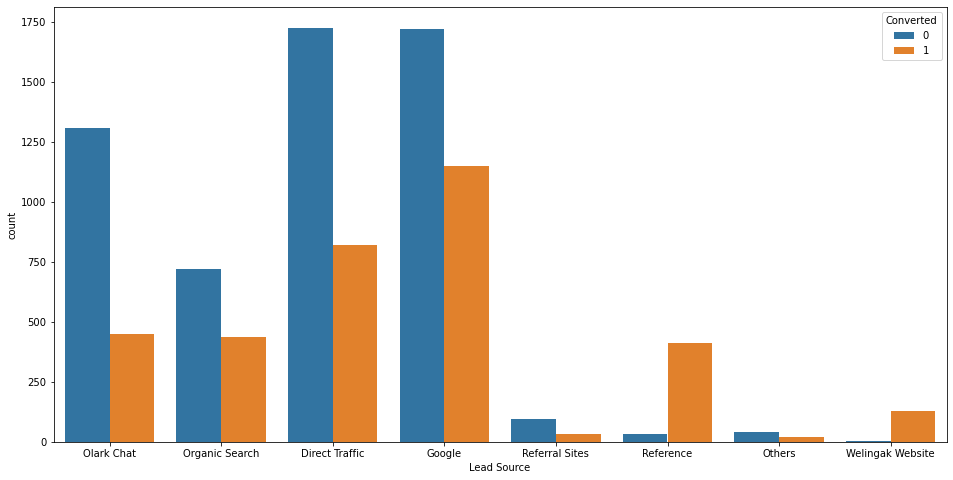

In [51]:
plt.figure(figsize=(16,8))
sns.countplot(x='Lead Source',hue='Converted',data=df)

#### Inference
'Reference' and 'Welingak Website' have great conversion rates

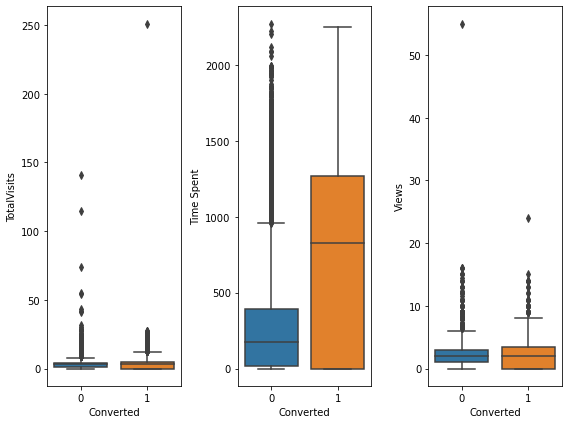

In [52]:
num_vars=['TotalVisits','Time Spent','Views']
plt.figure(figsize=(8,6))
for i,each in enumerate(num_vars):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=each,x='Converted',data=df)
    plt.tight_layout()

#### Inference
Time spent on the website has a strong correlation with the coversion rate

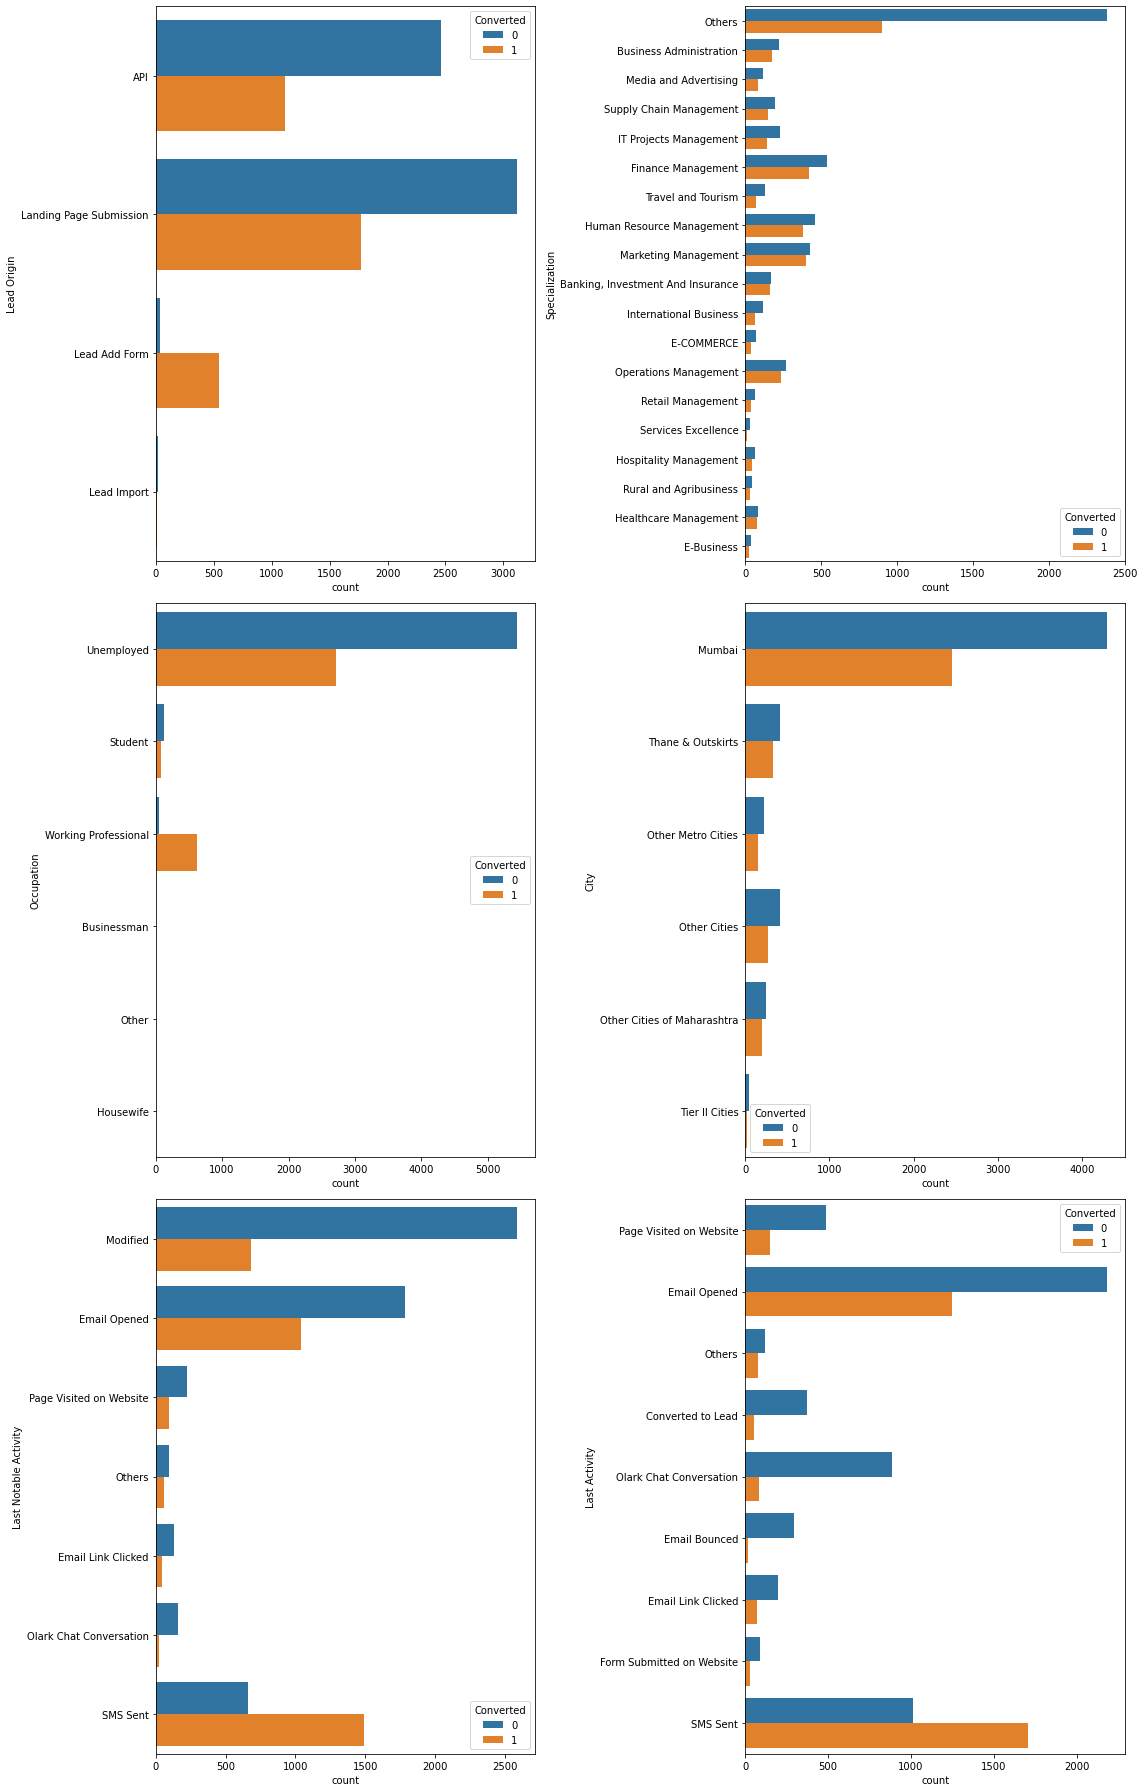

In [53]:
#Let's analyze all the categorical variables against the target variable
cats=['Lead Origin','Specialization','Occupation','City','Last Notable Activity', 'Last Activity']
plt.figure(figsize=(16,25))
for i,each in enumerate(cats):
    plt.subplot(3,2,i+1)
    sns.countplot(y=each,data=df,hue='Converted')
plt.tight_layout()

#### Inferences
* Leads with last notable activity as SMS sent have a high chance of conversion
* Working professionals have the highest conversion ratio
* Leads originating from Lead Add Form have high coversion ratio

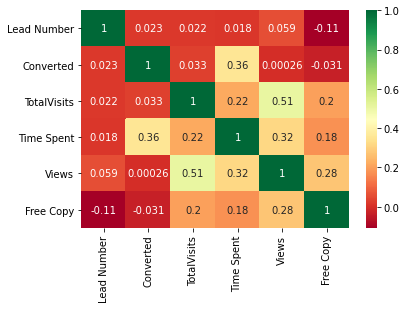

In [54]:
#Lets see the correaltion heatmap
sns.heatmap(df.corr(), cmap="RdYlGn",annot=True)

We do not see any alarmingly high levels of correlation in the data

## Data Preparation 
We will be converting all categorical features into dummy variables, by implmeneting one-hot encoding. 

In [55]:
#We can use prospect ID for identificatipon, dropping Lead Number
df.drop('Lead Number',inplace=True, axis=1)

In [56]:
df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Time Spent', 'Views', 'Last Activity', 'Specialization', 'Occupation',
       'City', 'Free Copy', 'Last Notable Activity'],
      dtype='object')

In [57]:
#creating dummy variables
dummy = pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','Specialization',
                           'Occupation','City','Last Notable Activity']], drop_first=True)
dummy.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
#Merging dummies into dataset
df=pd.concat([df,dummy],axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Views,Last Activity,Specialization,Occupation,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,1,0,0,0,0


In [59]:
#dropping dummified variables 
df.drop(['Lead Origin','Lead Source','Last Activity','Specialization',
                           'Occupation','City','Last Notable Activity'],inplace=True,axis=1)

In [60]:
df.head()

,Prospect ID,Converted,TotalVisits,Time Spent,Views,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Splitting the data into train and test set

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x=df.drop(['Converted','Prospect ID'],axis=1)
y=df[['Converted']]
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

In [63]:
# y_train.index = x_train['Prospect ID']
# x_train.index = x_train['Prospect ID']
# x_train.drop('Prospect ID',axis=1,inplace=True)

In [64]:
x_train.shape

(6351, 56)

In [65]:
y_train.shape

(6351, 1)

In [66]:
# y_test.index = x_test['Prospect ID']
# x_test.index=x_test['Prospect ID']
# x_test.drop('Prospect ID',axis=1,inplace=True)

In [67]:
x_test.shape

(2723, 56)

In [68]:
y_test.shape

(2723, 1)

## Scaling of numerical features

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler=StandardScaler()

In [71]:
x_train[['TotalVisits','Time Spent','Views']].describe()

,TotalVisits,Time Spent,Views
count,6351.000000,6351.000000,6351.000000
mean,3.371438,480.565895,2.336221
std,3.970894,544.310899,2.149108
min,0.000000,0.000000,0.000000
25%,1.000000,8.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,908.000000,3.000000
max,141.000000,2272.000000,55.000000


In [72]:
x_train[['TotalVisits','Time Spent','Views']] = scaler.fit_transform(x_train[['TotalVisits','Time Spent','Views']])
x_train[['TotalVisits','Time Spent','Views']].describe()

,TotalVisits,Time Spent,Views
count,6.351000e+03,6.351000e+03,6.351000e+03
mean,-2.039102e-16,1.047553e-16,-3.568324e-16
std,1.000079e+00,1.000079e+00,1.000079e+00
min,-8.491043e-01,-8.829581e-01,-1.087151e+00
25%,-5.972520e-01,-8.682595e-01,-6.218050e-01
50%,-9.354741e-02,-4.309750e-01,-1.564591e-01
75%,4.101572e-01,7.853375e-01,3.088868e-01
max,3.466207e+01,3.291456e+00,2.450688e+01


## Building the model

In [73]:
import statsmodels.api as sm

In [74]:
#Logistic Regression Model
m1 = sm.GLM(y_train,sm.add_constant(x_train), family = sm.families.Binomial())
m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.7
Date:                Mon, 30 Nov 2020   Deviance:                       5187.4
Time:                        07:34:35   Pearson chi2:                 6.53e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.0919      1.266      0.073      0.942      -2.389       2.573
TotalVisits                                       0.1336      0.049      2.747      0.006       0.038       0.229
Time Spent                                        1.0790      0.041     26.584      0.000       0.999       1.159
Views                                            -0.2119      0.057     -3.716      0.000      -0.324      -0.100
Free Copy                                        -0.2042      0.109     -1.882      0.060      -0.417       0.009
Lead Origin_Landing Page Submission              -1.0035      0.139     -7.243      0.000      -1.275      -0.732
Lead Origin_Lead Add Form                         1.6567      0.963      1.721      0.085      -0.230       3.544
Lead Origin_Lead Import                           0.5813      0.824      0.705      0.481      -1.034       2.197
Lead Source_Google                                0.3079      0.115      2.667      0.008       0.082       0.534
Lead Source_Olark Chat                            1.2734      0.164      7.745      0.000       0.951       1.596
Lead Source_Organic Search                        0.3645      0.131      2.778      0.005       0.107       0.622
Lead Source_Others                                0.2246      0.637      0.352      0.725      -1.025       1.474
Lead Source_Reference                             1.8985      0.990      1.917      0.055      -0.043       3.840
Lead Source_Referral Sites                        0.2491      0.333      0.747      0.455      -0.404       0.902
Lead Source_Welingak Website                      4.9277      1.398      3.524      0.000       2.187       7.669
Last Activity_Email Bounced                      -1.2011      0.432     -2.778      0.005      -2.049      -0.354
Last Activity_Email Link Clicked                  0.7214      0.394      1.829      0.067      -0.052       1.495
Last Activity_Email Opened                        1.0822      0.239      4.530      0.000       0.614       1.550
Last Activity_Form Submitted on Website          -0.1180      0.404     -0.292      0.770      -0.910       0.673
Last Activity_Olark Chat Conversation            -0.3329      0.269     -1.235      0.217      -0.861       0.195
Last Activity_Others                              0.9195      0.387      2.376      0.018       0.161       1.678
Last Activity_Page Visited on Website             0.1932      0.299      0.645      0.519      -0.394       0.780
Last Activity_SMS Sent                            1.1685      0.241      4.858      0.000       0.697       1.640
Specialization_Business Administration           -0.3302      0.236     -1.401      0.161      -0.792       0.132
Speci

Now we shall work towards refining this model

## Feature selection using RFE

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(x_train, y_train)
rfe.support_

array([False,  True, False, False,  True,  True, False, False,  True,
       False, False,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True])

In [76]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 20),
 ('Time Spent', True, 1),
 ('Views', False, 18),
 ('Free Copy', False, 14),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Others', False, 30),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 16),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 19),
 ('Specialization_E-Business', False, 35),
 ('Specializa

In [77]:
#columns chosen upon running RFE
cols=x_train.columns[rfe.support_]
cols

Index(['Time Spent', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Occupation_Housewife', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

## Rebuilding the model and assessing using SM

In [78]:
x_train_sm = sm.add_constant(x_train[cols])
m2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
m2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.6
Date:                Mon, 30 Nov 2020   Deviance:                       5251.1
Time:                        07:34:43   Pearson chi2:                 6.53e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.1122      0.653     -0.172      0.863      -1.392       1.167
Time Spent                                1.0804      0.040     27.023      0.000       1.002       1.159
Lead Origin_Landing Page Submission      -1.2272      0.128     -9.569      0.000      -1.479      -0.976
Lead Origin_Lead Add Form                 1.7938      0.838      2.141      0.032       0.152       3.436
Lead Source_Olark Chat                    1.0865      0.123      8.809      0.000       0.845       1.328
Lead Source_Reference                     1.5865      0.866      1.831      0.067      -0.111       3.284
Lead Source_Welingak Website              4.6260      1.314      3.520      0.000       2.051       7.202
Last Activity_Email Bounced              -1.4156      0.396     -3.572      0.000      -2.192      -0.639
Last Activity_Email Link Clicked          0.5335      0.232      2.304      0.021       0.080       0.987
Last Activity_Email Opened                0.9302      0.123      7.561      0.000       0.689       1.171
Last Activity_Olark Chat Conversation    -0.5155      0.193     -2.672      0.008      -0.894      -0.137
Last Activity_Others                      0.7126      0.343      2.075      0.038       0.039       1.386
Last Activity_SMS Sent                    0.9181      0.171      5.369      0.000       0.583       1.253
Specialization_Hospitality Management    -0.6686      0.332     -2.013      0.044      -1.319      -0.018
Specialization_Others                    -1.3531      0.126    -10.770      0.000      -1.599      -1.107
Occupation_Housewife                     22.0642   1.33e+04      0.002      0.999    -2.6e+04    2.61e+04
Occupation_Student                       -0.3173      0.680     -0.466      0.641      -1.651       1.016
Occupation_Unemployed                    -0.9041      0.643     -1.405      0.160      -2.165       0.357
Occupation_Working Professional           1.6648      0.669      2.489      0.013       0.354       2.976
Last Notable Activity_Others              0.7964      0.386      2.064      0.039       0.040       1.553
Last Notable Activity_SMS Sent            1.3854      0.147      9.454      0.000       1.098       1.673
=========================================================================================================
"""

In [79]:
#checking VIF

getvif(x_train_sm)

,Features,VIF
2,Lead Origin_Lead Add Form,46.19
4,Lead Source_Reference,35.67
16,Occupation_Unemployed,16.51
5,Lead Source_Welingak Website,11.42
11,Last Activity_SMS Sent,7.10
1,Lead Origin_Landing Page Submission,7.09
19,Last Notable Activity_SMS Sent,4.74
13,Specialization_Others,4.52
8,Last Activity_Email Opened,3.96
3,Lead Source_Olark Chat,2.40


In [80]:
#let's drop Occupation_Housewife since it shows to be less signficant in the model (relatively higher p value)
x_train_sm.drop('Occupation_Housewife',axis=1,inplace=True)

In [81]:
#Rebuilding the model
x_train_sm = sm.add_constant(x_train_sm)
m3 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
print(m3.fit().summary())
#checking vifs
getvif(x_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.8
Date:                Mon, 30 Nov 2020   Deviance:                       5257.5
Time:                        07:34:45   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Add Form,46.19
4,Lead Source_Reference,35.66
15,Occupation_Unemployed,16.20
5,Lead Source_Welingak Website,11.42
11,Last Activity_SMS Sent,7.08
1,Lead Origin_Landing Page Submission,7.01
18,Last Notable Activity_SMS Sent,4.74
13,Specialization_Others,4.50
8,Last Activity_Email Opened,3.92
3,Lead Source_Olark Chat,2.40


In [82]:
#Dropping Lead Source_Reference since it is least signficant, and has a high VIF
x_train_sm = sm.add_constant(x_train_sm.drop('Lead Source_Reference',axis=1))
#Rebuilding the model
m4 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
print(m4.fit().summary())
#checking vifs
getvif(x_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.1
Date:                Mon, 30 Nov 2020   Deviance:                       5260.2
Time:                        07:34:45   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,Features,VIF
14,Occupation_Unemployed,16.20
10,Last Activity_SMS Sent,7.08
1,Lead Origin_Landing Page Submission,7.01
17,Last Notable Activity_SMS Sent,4.74
12,Specialization_Others,4.50
7,Last Activity_Email Opened,3.92
3,Lead Source_Olark Chat,2.39
8,Last Activity_Olark Chat Conversation,2.21
15,Occupation_Working Professional,2.15
2,Lead Origin_Lead Add Form,1.95


In [83]:
#Dropping Occupation_Unemployed since it has a high correlation with other features
x_train_sm = sm.add_constant(x_train_sm.drop('Occupation_Unemployed',axis=1))
#Rebuilding the model
m5 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
print(m5.fit().summary())
#checking vifs
getvif(x_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.1
Date:                Mon, 30 Nov 2020   Deviance:                       5270.2
Time:                        07:34:46   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,Features,VIF
10,Last Activity_SMS Sent,6.20
16,Last Notable Activity_SMS Sent,4.73
1,Lead Origin_Landing Page Submission,3.14
7,Last Activity_Email Opened,2.80
12,Specialization_Others,2.76
3,Lead Source_Olark Chat,2.29
8,Last Activity_Olark Chat Conversation,1.90
2,Lead Origin_Lead Add Form,1.74
15,Last Notable Activity_Others,1.71
9,Last Activity_Others,1.68


In [84]:
#Dropping Last Activity_Others since it is coming out to be relatively less significant
x_train_sm = sm.add_constant(x_train_sm.drop('Last Activity_Others',axis=1))
#Rebuilding the model
m6 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
print(m6.fit().summary())
#checking vifs
getvif(x_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.0
Date:                Mon, 30 Nov 2020   Deviance:                       5274.1
Time:                        07:34:47   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,Features,VIF
9,Last Activity_SMS Sent,6.12
15,Last Notable Activity_SMS Sent,4.73
1,Lead Origin_Landing Page Submission,2.97
7,Last Activity_Email Opened,2.70
11,Specialization_Others,2.69
3,Lead Source_Olark Chat,2.28
8,Last Activity_Olark Chat Conversation,1.87
2,Lead Origin_Lead Add Form,1.73
4,Lead Source_Welingak Website,1.35
0,Time Spent,1.31


In [85]:
#Dropping Specialization_Hospitality Management since it is coming out to be relatively less significant
x_train_sm = sm.add_constant(x_train_sm.drop('Specialization_Hospitality Management',axis=1))
#Rebuilding the model
m7 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
print(m7.fit().summary())
#checking vifs
getvif(x_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.1
Date:                Mon, 30 Nov 2020   Deviance:                       5278.2
Time:                        07:34:47   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,Features,VIF
9,Last Activity_SMS Sent,6.12
14,Last Notable Activity_SMS Sent,4.73
1,Lead Origin_Landing Page Submission,2.97
7,Last Activity_Email Opened,2.69
10,Specialization_Others,2.69
3,Lead Source_Olark Chat,2.28
8,Last Activity_Olark Chat Conversation,1.87
2,Lead Origin_Lead Add Form,1.73
4,Lead Source_Welingak Website,1.35
0,Time Spent,1.31


In [86]:
#We are getting a high VIF for last activity and last notable activity "SMS Sent"
#We can see that these two are highly correlated, thus we can drop one of them
x_train_sm[['Last Activity_SMS Sent','Last Notable Activity_SMS Sent']].corr()

,Last Activity_SMS Sent,Last Notable Activity_SMS Sent
Last Activity_SMS Sent,1.000000,0.849553
Last Notable Activity_SMS Sent,0.849553,1.000000


In [87]:
#We'll drop Last Activity_SMS Sent due to the high correlation
x_train_sm = sm.add_constant(x_train_sm.drop('Last Activity_SMS Sent',axis=1))
#Rebuilding the model
m8 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
print(m8.fit().summary())
#checking VIFs too
getvif(x_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.7
Date:                Mon, 30 Nov 2020   Deviance:                       5303.3
Time:                        07:34:48   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,Features,VIF
9,Specialization_Others,2.44
1,Lead Origin_Landing Page Submission,2.41
7,Last Activity_Email Opened,2.31
3,Lead Source_Olark Chat,2.24
13,Last Notable Activity_SMS Sent,1.94
8,Last Activity_Olark Chat Conversation,1.74
2,Lead Origin_Lead Add Form,1.65
4,Lead Source_Welingak Website,1.35
0,Time Spent,1.30
5,Last Activity_Email Bounced,1.21


In [88]:
#Last Activity_Email Link Clicked is highly insignificant in the model with a high p value
#we will drop it 
x_train_sm = sm.add_constant(x_train_sm.drop('Last Activity_Email Link Clicked',axis=1))
#Rebuilding the model
m9 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
print(m9.fit().summary())
#checking VIFs too
getvif(x_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.9
Date:                Mon, 30 Nov 2020   Deviance:                       5303.8
Time:                        07:34:49   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,Features,VIF
8,Specialization_Others,2.36
1,Lead Origin_Landing Page Submission,2.24
3,Lead Source_Olark Chat,2.20
6,Last Activity_Email Opened,2.18
12,Last Notable Activity_SMS Sent,1.85
7,Last Activity_Olark Chat Conversation,1.68
2,Lead Origin_Lead Add Form,1.62
4,Lead Source_Welingak Website,1.34
0,Time Spent,1.30
5,Last Activity_Email Bounced,1.19


## Model Finalized

In [89]:
#Let's move forward with this model
res = m9.fit()

In [90]:
#getting predicted values on the train set
y_train_pred = res.predict(x_train_sm)

In [91]:
y_train_pred.shape

(6351,)

In [92]:
y_train_pred[:10]

7656    0.448574
7775    0.100615
5287    0.135509
3315    0.541455
4058    0.995919
363     0.340352
6714    0.665101
4797    0.783092
9109    0.265426
5264    0.060730
dtype: float64

In [93]:
#changing predictions to array
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.44857353, 0.10061459, 0.13550857, 0.54145524, 0.99591905,
       0.34035159, 0.6651007 , 0.78309201, 0.26542613, 0.06073011])

In [94]:
#creating new df for predictions
y_train_pred_final = pd.DataFrame({'Converted':y_train.values.reshape(-1),'Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Prob,ID
0,0,0.448574,7656
1,0,0.100615,7775
2,0,0.135509,5287
3,1,0.541455,3315
4,1,0.995919,4058


In [95]:
y_train_pred_final['Predicted'] = y_train_pred_final.Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final[:10]

,Converted,Prob,ID,Predicted
0,0,0.448574,7656,0
1,0,0.100615,7775,0
2,0,0.135509,5287,0
3,1,0.541455,3315,1
4,1,0.995919,4058,1
5,0,0.340352,363,0
6,1,0.665101,6714,1
7,1,0.783092,4797,1
8,1,0.265426,9109,0
9,0,0.060730,5264,0


Now we have trained our model and have the predictions on the training set. We will now see some metrics on the predictions made on the training set.

In [96]:
from sklearn import metrics

In [97]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3489,  450],
       [ 718, 1694]])

In [98]:
#We now have our confusion matrix. 
tn = confusion[0][0] #true neatives
tp = confusion[1][1] #true positives
fp = confusion[0][1] #false positives
fn = confusion[1][0] #false negatives

In [99]:
#Let's check overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8160919540229885

#### Note
We have obtained quite good accuracy of 81.6%

We will now look at some more metrics, to see how the model is really performing on the train data, and how relevant it will be to meet the business objective.

In [100]:
#Sensitivity - this will need to be maximized since the business objective is to identify the hottest leads. 
#We would not want to miss any of the positives in this scenario.
tp / float (tp+fn)

0.7023217247097844

In [101]:
#specificity - this is a measure of how well the model can tell if a lead is not worth following
tn / float(tn+fp)

0.8857578065498858

In [102]:
#False positive rate - from all the neagtives, how many were falsely predicted as positive? This should be minimized.
fp/float(tn+fp)

0.11424219345011424

In [103]:
#True positive rate - from all the positives, how many were correctly predicted as positive? This should be maximized.
#This is same as sensitivity
tp/float(tp+fn)

0.7023217247097844

In [104]:
#Positive predictive value
tp/float(tp+fp)

0.7901119402985075

In [105]:
#negative predictive value 
tn/float(tn+fn)

0.8293320656049441

All the metrics calculated above are in an acceptable range, but we can work on improving it further and tuning the model to better align with business objective

We will now plot the ROC curve.
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

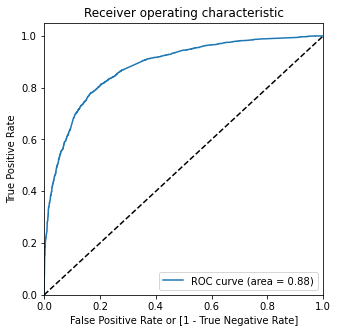

In [107]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Prob)

#### Inference
Since the ROC curve sticking close to the edge and resembling a right angle triangle, we have a good operating chacteristic

## Finding optimal cut-off point
We initially chose the cut-off point for the model as 0.5. The lead score itself would serve the purpose of the model, but for sake on analysis, we will try to find the optimal cutoff point for prediction, and it can be included as a recommendation to the business. 

In [108]:
# Let's create columns with different probability cutoffs 
numbers = [(round(i/100,2)) for i in range(0,101,5)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Prob,ID,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
0,0,0.448574,7656,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.100615,7775,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.135509,5287,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.541455,3315,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0.995919,4058,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [(round(i/100,2)) for i in range(0,101,5)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
#     accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final[i])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      prob  accuracy  sensitivity  specificity
0.00  0.00  0.379783     1.000000     0.000000
0.05  0.05  0.430326     0.995854     0.084031
0.10  0.10  0.595339     0.970564     0.365575
0.15  0.15  0.693749     0.928690     0.549886
0.20  0.20  0.740198     0.907546     0.637725
0.25  0.25  0.779877     0.859867     0.730896
0.30  0.30  0.790269     0.837065     0.761615
0.35  0.35  0.804913     0.801824     0.806804
0.40  0.40  0.812943     0.771973     0.838030
0.45  0.45  0.815462     0.733002     0.865956
0.50  0.50  0.816092     0.702322     0.885758
0.55  0.55  0.802236     0.619818     0.913938
0.60  0.60  0.797512     0.583333     0.928662
0.65  0.65  0.791214     0.543118     0.943133
0.70  0.70  0.782554     0.508292     0.950495
0.75  0.75  0.772162     0.466003     0.959634
0.80  0.80  0.760353     0.415423     0.971566
0.85  0.85  0.743977     0.357794     0.980452
0.90  0.90  0.720989     0.284411     0.988322
0.95  0.95  0.688238     0.185323     0.996192
1.00  1.00  0

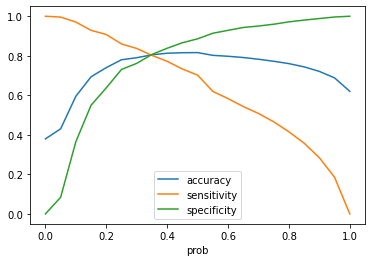

In [110]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### Inference
From the plot above, it is clear that a value of around 0.3 would be the optimum cut-off for the lead score. Thus, a lead score above 0.3 would qualify as a hot lead and should be pursued by the company, and would have a much better chance of getting converted.

Since the business objective is to get a target of 80% lead conversion rate, we have to keep this in mind while setting the threshold as well.

In [111]:
y_train_pred_final.head()

,Converted,Prob,ID,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
0,0,0.448574,7656,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0.100615,7775,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.135509,5287,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.541455,3315,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0.995919,4058,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [112]:
#Trying cutoff 0.35
cutoff=0.35

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Prob.map( lambda x: 1 if x > cutoff else 0)

#Also adding Lead Score in line with the business objective
y_train_pred_final['Lead Score'] = y_train_pred_final['Prob'].apply(lambda x: int(round(x*100,0)))

#We can remove the rest of the columns now
y_train_pred_final = y_train_pred_final[['Converted','Prob','ID','final_predicted','Lead Score']]

y_train_pred_final.head()

,Converted,Prob,ID,final_predicted,Lead Score
0,0,0.448574,7656,1,45
1,0,0.100615,7775,0,10
2,0,0.135509,5287,0,14
3,1,0.541455,3315,1,54
4,1,0.995919,4058,1,100


In [114]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
confusion2

array([[3178,  761],
       [ 478, 1934]])

In [115]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8049126121870571

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8018242122719734

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.8068037572988068

In [118]:
# Calculate false postive rate - predicting conversion when the customer would not convert
print(FP/ float(TN+FP))

0.1931962427011932


In [119]:
#Setting cutoff 0.3
cutoff=0.3

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Prob.map( lambda x: 1 if x > cutoff else 0)

#Also adding Lead Score in line with the business objective
y_train_pred_final['Lead Score'] = y_train_pred_final['Prob'].apply(lambda x: int(round(x*100,0)))

#We can remove the rest of the columns now
y_train_pred_final = y_train_pred_final[['Converted','Prob','ID','final_predicted','Lead Score']]

y_train_pred_final.head()

,Converted,Prob,ID,final_predicted,Lead Score
0,0,0.448574,7656,1,45
1,0,0.100615,7775,0,10
2,0,0.135509,5287,0,14
3,1,0.541455,3315,1,54
4,1,0.995919,4058,1,100


In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7902692489371752

In [122]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3000,  939],
       [ 393, 2019]])

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8370646766169154

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.7616146230007617

In [126]:
# Calculate false postive rate - predicting conversion when the customer would not convert
print(FP/ float(TN+FP))

0.2383853769992384


In [127]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6825557809330629


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8841732979664014


#### Inference
* We obtain an accuracy of 79% on the training data, while maintaing a sensitivity of 84%. 
* We can proceed with these results since they are in line with business objective

## Precision and Recall

In [129]:
#We have the confusion matrix as 
confusion2

array([[3000,  939],
       [ 393, 2019]])

In [130]:
#Precision 
TP/(TP+FP)

0.6825557809330629

In [131]:
#recall
TP/(TP+FN)

0.8370646766169154

In [132]:
#We can also get the precision and recall values usking sklearn
from sklearn.metrics import precision_score, recall_score

In [133]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6825557809330629

In [134]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8370646766169154

## Precision and Recall Trade-off

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Prob)

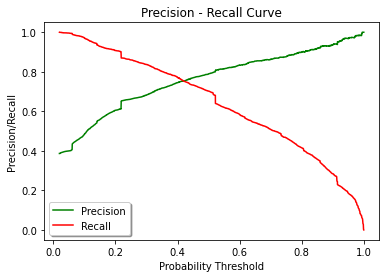

In [137]:
fig,ax=plt.subplots()
ax.plot(thresholds, p[:-1], "g-", label='Precision') #plotting precision as green line
ax.plot(thresholds, r[:-1], "r-", label = 'Recall') #plotting recall as red line
plt.xlabel('Probability Threshold')
legend = ax.legend(loc='best', shadow=True)
plt.ylabel('Precision/Recall')
plt.title('Precision - Recall Curve')
plt.show()

A value close to 0.3 seems to be optimal.

## Making predictions on the test set

In [138]:
#We will scale numerical features just like we did in train set. This time, we fit don't fit the scaler, we directly transform the data.
x_test[['TotalVisits','Time Spent','Views']] = scaler.transform(x_test[['TotalVisits','Time Spent','Views']])
x_test.head()

,TotalVisits,Time Spent,Views,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4079,0.158305,1.795869,0.774233,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8310,-0.849104,-0.882958,-1.087151,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1708,-0.093547,-0.375855,0.308887,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8025,1.417566,1.777496,-0.249528,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2414,-0.849104,-0.882958,-1.087151,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [139]:
#retaining only the features that we used in our final model
x_test = x_test[list(x_train_sm.drop('const',axis=1).columns)]

In [140]:
x_test_sm = sm.add_constant(x_test)

In [141]:
x_test_sm

,const,Time Spent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Specialization_Others,Occupation_Student,Occupation_Working Professional,Last Notable Activity_Others,Last Notable Activity_SMS Sent
4079,1.0,1.795869,1,0,0,0,0,1,0,0,0,0,0,0
8310,1.0,-0.882958,0,0,1,0,0,0,0,1,0,0,0,1
1708,1.0,-0.375855,1,0,0,0,0,0,0,0,0,0,0,0
8025,1.0,1.777496,0,0,0,0,0,1,0,1,0,0,0,0
2414,1.0,-0.882958,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,1.0,-0.570612,1,0,0,0,0,0,0,0,0,1,0,1
5884,1.0,-0.622057,1,0,0,0,0,1,0,0,0,0,0,0
2407,1.0,-0.405252,1,0,0,0,0,0,0,0,0,0,0,0
148,1.0,-0.456698,1,0,0,0,0,1,0,0,0,0,0,0


In [142]:
#Making predictions
y_test_pred = res.predict(x_test_sm)

In [143]:
#creating new df for predictions
y_test_pred_final = pd.DataFrame({'Converted':y_test.values.reshape(-1),'Prob':y_test_pred})
y_test_pred_final['ID'] = y_test.index
y_test_pred_final.head()

,Converted,Prob,ID
4079,0,0.649925,4079
8310,1,0.521875,8310
1708,0,0.094822,1708
8025,1,0.618026,8025
2414,0,0.218212,2414


In [144]:
#Setting cutoff to 0.35 to see parameters
cutoff = 0.35

In [145]:
y_test_pred_final['Predicted'] = y_test_pred_final.Prob.map(lambda x: 1 if x>cutoff else 0)
#We will also all add a "Lead Score" column, in line with the business objective.
y_test_pred_final['Lead Score'] = y_test_pred_final['Prob'].apply(lambda x: int(round(x*100,0)))
y_test_pred_final[:10]

,Converted,Prob,ID,Predicted,Lead Score
4079,0,0.649925,4079,1,65
8310,1,0.521875,8310,1,52
1708,0,0.094822,1708,0,9
8025,1,0.618026,8025,1,62
2414,0,0.218212,2414,0,22
5640,0,0.218212,5640,0,22
5978,0,0.392433,5978,1,39
8659,0,0.059925,8659,0,6
9095,0,0.119355,9095,0,12
2861,0,0.084036,2861,0,8


In [146]:
#Confusion Matrix for predictions on test data
confusion3 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives# Let's see the sensitivity of our logistic regression model
confusion3

array([[1352,  348],
       [ 185,  838]])

In [147]:
#Accuracy on test data
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.8042600073448403

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8191593352883676

In [149]:
# Let us calculate specificity
TN / float(TN+FP)

0.7952941176470588

In [150]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.20470588235294118


In [151]:
#Setting cutoff to 0.3
cutoff=0.3

In [152]:
y_test_pred_final['Predicted'] = y_test_pred_final.Prob.map(lambda x: 1 if x>cutoff else 0)
#We will also all add a "Lead Score" column, in line with the business objective.
y_test_pred_final['Lead Score'] = y_test_pred_final['Prob'].apply(lambda x: int(round(x*100,0)))
y_test_pred_final[:10]

,Converted,Prob,ID,Predicted,Lead Score
4079,0,0.649925,4079,1,65
8310,1,0.521875,8310,1,52
1708,0,0.094822,1708,0,9
8025,1,0.618026,8025,1,62
2414,0,0.218212,2414,0,22
5640,0,0.218212,5640,0,22
5978,0,0.392433,5978,1,39
8659,0,0.059925,8659,0,6
9095,0,0.119355,9095,0,12
2861,0,0.084036,2861,0,8


In [153]:
#Accuracy on test data
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.792508262945281

In [154]:
#Confusion Matrix for predictions on test data
confusion3 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives# Let's see the sensitivity of our logistic regression model
confusion3

array([[1285,  415],
       [ 150,  873]])

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8533724340175953

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.7558823529411764

In [157]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.24411764705882352


In [158]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6777950310559007


In [159]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8954703832752613


#### Inference
* We have obtained an accuracy of 79.25% on the test data, while maintaining a sensitivity of 85.3%. Thus, we can conclude that our model is performing well and can be rolled out to meet the business objective.
* Our model evaluation parameters have not changed and remained about the same when runnning them on test data. Hence, we can conclude that the model is quite stable.

In [160]:
#Recommendations
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.9
Date:                Mon, 30 Nov 2020   Deviance:                       5303.8
Time:                        07:35:31   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6360      0.135     -4.705      0.000      -0.901      -0.371
Time Spent                                1.0771      0.040     27.168      0.000       0.999       1.155
Lead Origin_Landing Page Submission      -1.2153      0.127     -9.558      0.000      -1.465      -0.966
Lead Origin_Lead Add Form                 3.3943      0.245     13.830      0.000       2.913       3.875
Lead Source_Olark Chat                    1.1084      0.123      9.015      0.000       0.867       1.349
Lead Source_Welingak Website              3.1238      1.038      3.009      0.003       1.089       5.159
Last Activity_Email Bounced              -1.9418      0.376     -5.171      0.000      -2.678      -1.206
Last Activity_Email Opened                0.5356      0.091      5.857      0.000       0.356       0.715
Last Activity_Olark Chat Conversation    -0.9269      0.173     -5.349      0.000      -1.267      -0.587
Specialization_Others                    -1.3331      0.124    -10.709      0.000      -1.577      -1.089
Occupation_Student                        0.5482      0.225      2.436      0.015       0.107       0.989
Occupation_Working Professional           2.5353      0.190     13.326      0.000       2.162       2.908
Last Notable Activity_Others              1.0647      0.270      3.937      0.000       0.535       1.595
Last Notable Activity_SMS Sent            1.8993      0.100     18.920      0.000       1.703       2.096
=========================================================================================================
"""

In [161]:
#We will now look at the most important features identified in our model

final_model = pd.DataFrame(res.params) #getting model parameters (features and coefficients)

final_model['Feature']=final_model.index 
final_model.index = range(len(final_model))

final_model = final_model.rename(columns = {0:'Coefficient'})[['Feature','Coefficient']] #renaming columns for better understanding
final_model.sort_values(by='Coefficient', ascending=False, ignore_index = True) #sorting by coefficient

,Feature,Coefficient
0,Lead Origin_Lead Add Form,3.394285
1,Lead Source_Welingak Website,3.123849
2,Occupation_Working Professional,2.535268
3,Last Notable Activity_SMS Sent,1.899293
4,Lead Source_Olark Chat,1.108351
5,Time Spent,1.077125
6,Last Notable Activity_Others,1.064727
7,Occupation_Student,0.548249
8,Last Activity_Email Opened,0.535624
9,const,-0.635963


## Inferences
* The most important colums from the dataset can be identified as below
    * Lead Origin
    * Lead Source
    * Time Spent
    * Occupation
    * Last Activity
    * Last Notable Activity
* The most important features (dummy variables) used in the model can be identified as below: 
    * Lead Origin_Lead Add Form
    * Lead Source_Welingak Website
    * Occupation_Working Professional
    * Last Activity_Email Bounced
    * Last Notable Activity_SMS Sent
* Recommendations to business can be made on the basis of the lead score. Since we chose the probability cut off at 0.3, this would translate to a score of 30. This can be tweaked as and when the needs of the business change   